# Меры разброса

In [49]:
import pandas as pd
import numpy as np

bikes = pd.read_pickle('BikesDataVars.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [50]:
bikes_hour = pd.DataFrame(bikes.groupby('Hour')['Rental Count'].sum())

<Axes: xlabel='Hour'>

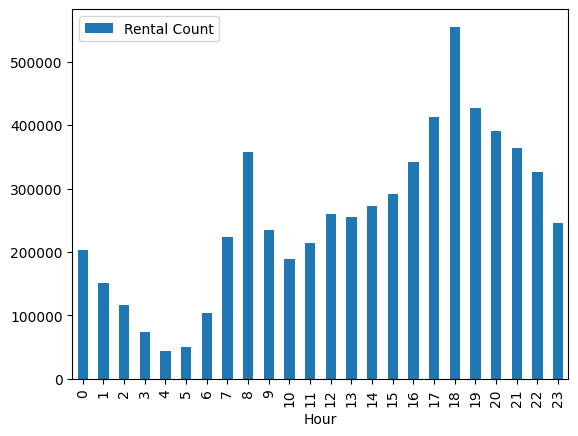

In [51]:
bikes_hour.plot(kind='bar')

In [52]:
bikes_hour.describe()

,Rental Count
count,24.000000
mean,254252.458333
std,128710.527497
min,44836.000000
25%,180044.500000
50%,250500.500000
75%,346196.750000
max,554429.000000


In [53]:
# размах


In [54]:
# интерквартильный размах

In [55]:
# перцентили
print(np.percentile(bikes_hour['Rental Count'], 25))
print(np.quantile(bikes_hour['Rental Count'], 0.25))

180044.5
180044.5


In [56]:
bikes_mean = bikes_hour['Rental Count'].mean()
deviations = bikes_hour['Rental Count'] - bikes_mean
sq_deviations = deviations ** 2
variance_samp = sq_deviations.sum() / (len(bikes_hour) - 1)
std_samp = np.sqrt(variance_samp)
print(variance_samp)
print(std_samp)

16566399888.43297
128710.52749652209


In [57]:
print(bikes_hour['Rental Count'].var())
print(np.sqrt(bikes_hour['Rental Count'].var()))
print(bikes_hour['Rental Count'].std())

16566399888.43297
128710.52749652209
128710.52749652209


In [58]:
variance_pop = sq_deviations.sum() / (len(bikes_hour))
print(variance_pop)
print(np.sqrt(variance_pop))

15876133226.41493
126000.52867514061


In [59]:
bikes.groupby('Hour')['Rental Count'].std()

Hour
0      455.016192
1      338.058896
2      268.797389
3      162.601701
4      106.375778
5      113.191916
6      273.636723
7      582.515881
8      871.005983
9      500.018849
10     415.278139
11     452.773454
12     538.838247
13     539.252891
14     613.267340
15     631.989742
16     744.642450
17     935.173622
18    1286.770715
19    1088.371072
20     995.999725
21     916.900635
22     787.161188
23     581.424225
Name: Rental Count, dtype: float64

In [60]:
print(bikes_hour['Rental Count'].max()-bikes_hour['Rental Count'].min())
print(bikes_hour['Rental Count'].std())
print(bikes_hour['Rental Count'].var())
# TODO дисперсию, стандартное отклонение

509593
128710.52749652209
16566399888.43297


In [61]:
counts = bikes_hour['Rental Count'].count()

In [62]:
mean = bikes_hour['Rental Count'].sum()/counts

In [63]:
square = lambda x: (x-mean)**2
variance = sum(map(square, bikes_hour['Rental Count']))/counts

In [64]:
print(bikes_hour['Rental Count'].std())
print(np.sqrt(variance))
print(bikes_hour['Rental Count'].var())
print(variance)

128710.52749652209
126000.52867514061
16566399888.43297
15876133226.414932
